# OLS using statsmodels

# 1. Simple (univariate) regression

In [20]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import statsmodels.formula.api as smf

df = pd.DataFrame({'cigs': [0,10,20,30], 'lung':[14,105,208,356]})


In [21]:
df

,cigs,lung
0,0,14
1,10,105
2,20,208
3,30,356


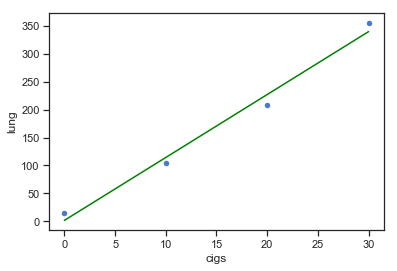

In [22]:
df.plot('cigs', 'lung', kind='scatter')
lm = smf.ols(formula = 'lung ~ cigs', data = df).fit()
xmin = df.cigs.min()
xmax = df.cigs.max()
X = np.linspace(xmin, xmax, 100)
Y = lm.params[0] + lm.params[1] * X
plt.plot(X,Y, color = "green")

In [23]:
lm.predict({'cigs': [15]})

0    170.75
dtype: float64

In [24]:
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                   lung   R-squared:                       0.987
Model:                            OLS   Adj. R-squared:                  0.980
Method:                 Least Squares   F-statistic:                     147.1
Date:                Mon, 01 Oct 2018   Prob (F-statistic):            0.00673
Time:                        09:18:37   Log-Likelihood:                -16.433
No. Observations:                   4   AIC:                             36.87
Df Residuals:                       2   BIC:                             35.64
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      1.4000     17.417      0.080      0.9

/Users/olivier/anaconda3/lib/python3.6/site-packages/statsmodels/stats/stattools.py:72: ValueWarning: omni_normtest is not valid with less than 8 observations; 4 samples were given.
  "samples were given." % int(n), ValueWarning)


# 2 Multivariate regressions

# 2.1 Get data and clean up

In [198]:
import pandas as pd
df = pd.read_csv("AirQualityUCI.csv", sep = ';')
df.head()

In [199]:
# Data clean up: Rename columns and eliminate unneeded columns
df.columns.values[2] = 'CO'
df.columns.values[3] = 'CO-T'
df.columns.values[4] = 'NMHC'
df.columns.values[5] = 'NMHC-T'
df.columns.values[6] = 'Benzene'
df.columns.values[7] = 'NOx'
df.columns.values[8] = 'NOx-T'
df.columns.values[9] = 'NO2'
df.columns.values[10] = 'NO2-T'
df.columns.values[11] = 'O3'
df.columns.values[12] = 'Temp'
df.columns.values[13] = 'RH'
df.columns.values[14] = 'AH'

# drop some empty columns
df = df.drop('Unnamed: 15',1)
df = df.drop('Unnamed: 16',1)

# Drop rows where NMHC is set to -200
df.drop(df.loc[df['NMHC']== -200].index, inplace=True) #inplace=True does the droping and returns nothing
df.dropna(inplace = True)

# in Temp and RA and RH, decimals are recorded with ',' rather than '.' and are strings not numeric data
cols = ['Temp', 'RH', 'AH']
for col in cols:
    df[col] = df[col].str.replace(',','.')
    df[col] = df[col].apply(pd.to_numeric)

In [206]:
df.head()

,Date,Time,CO,CO-T,NMHC,NMHC-T,Benzene,NOx,NOx-T,NO2,NO2-T,O3,Temp,RH,AH
0,10/03/2004,18.00.00,"2,6",1360.0,150.0,"11,9",1046.0,166.0,1056.0,113.0,1692.0,1268.0,13.6,48.9,0.7578
1,10/03/2004,19.00.00,2,1292.0,112.0,"9,4",955.0,103.0,1174.0,92.0,1559.0,972.0,13.3,47.7,0.7255
2,10/03/2004,20.00.00,"2,2",1402.0,88.0,"9,0",939.0,131.0,1140.0,114.0,1555.0,1074.0,11.9,54.0,0.7502
3,10/03/2004,21.00.00,"2,2",1376.0,80.0,"9,2",948.0,172.0,1092.0,122.0,1584.0,1203.0,11.0,60.0,0.7867
4,10/03/2004,22.00.00,"1,6",1272.0,51.0,"6,5",836.0,131.0,1205.0,116.0,1490.0,1110.0,11.2,59.6,0.7888


In [201]:
df.mean()

CO-T       1148.748359
NMHC        218.811816
Benzene     909.683807
NOx         127.913567
NOx-T       952.152079
NO2          87.204595
NO2-T      1528.519694
O3          986.912473
Temp          8.977681
RH           42.451641
AH           -5.100850
dtype: float64

In [207]:
df[2:].describe()

,CO-T,NMHC,Benzene,NOx,NOx-T,NO2,NO2-T,O3,Temp,RH,AH
count,912.000000,912.000000,912.000000,912.000000,912.000000,912.000000,912.000000,912.000000,912.000000,912.000000,912.000000
mean,1148.359649,219.004386,909.484649,127.899123,951.794956,87.171053,1528.307018,986.620614,8.967873,42.438816,-5.113663
std,337.144573,204.640849,331.088153,104.866863,340.856335,66.812789,424.598523,445.683031,36.826719,44.967031,34.059290
min,-200.000000,7.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000
25%,977.750000,66.750000,701.750000,73.000000,763.500000,74.000000,1333.750000,717.750000,11.300000,36.100000,0.708850
50%,1141.500000,150.000000,917.500000,122.500000,929.000000,97.000000,1530.500000,971.500000,14.600000,49.950000,0.812700
75%,1351.000000,297.500000,1126.000000,184.000000,1153.250000,121.000000,1759.500000,1291.000000,18.000000,61.125000,0.921775
max,2040.000000,1189.000000,1754.000000,478.000000,1935.000000,196.000000,2679.000000,2359.000000,30.000000,83.200000,1.485200


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1a2174aef0>,
      dtype=object)

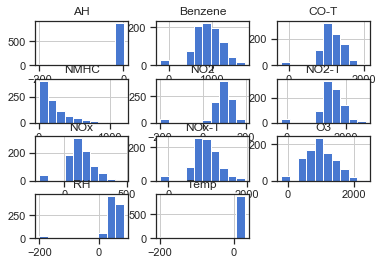

In [204]:
# visualize data on a multidimensional scatterplot
df.hist()

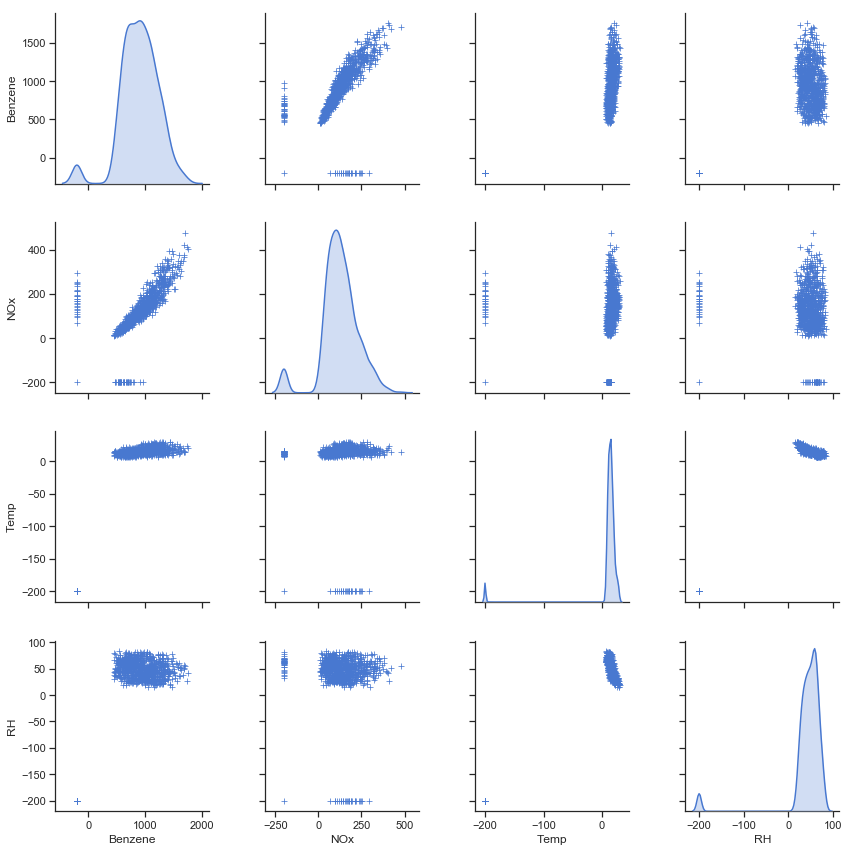

In [209]:
# Better displays using seaborn
import seaborn as sns

cols = ['Benzene', 'NOx', 'Temp', 'RH', ]
sns.set(color_codes = True, palette = "muted", style = "ticks")
sns.pairplot(df[cols], height = 3, markers = "+", diag_kind = "kde")
plt.tight_layout()
plt.show()

# Still many values at -200
Need to eliminate these values.